In [5]:
%run ../common_functions/import_all.py

from common_functions.setup_notebook import set_css_style, setup_matplotlib, config_ipython

import cv2

config_ipython()
setup_matplotlib()
set_css_style()

# Edge detection and object contours

## Trying the Canny out in OpenCV

Let's use OpenCV's implementation. I'll use a photo with two pens on a red surface, and because the surface is reflecting, in one corner you can see the light reflection of something. We'll see how non-trivial the task of extracting the edges is, in terms of the dependency of the result to the thresholds used. 

In [6]:
# Read image with OpenCV
image = cv2.imread('pens.jpg')

# OpenCV reads it in BGR, Matplotlib interprets it in RGB, so created a converted colourspace one
RGB_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# also create a grayscale converted image as Canny wants single-channel input
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

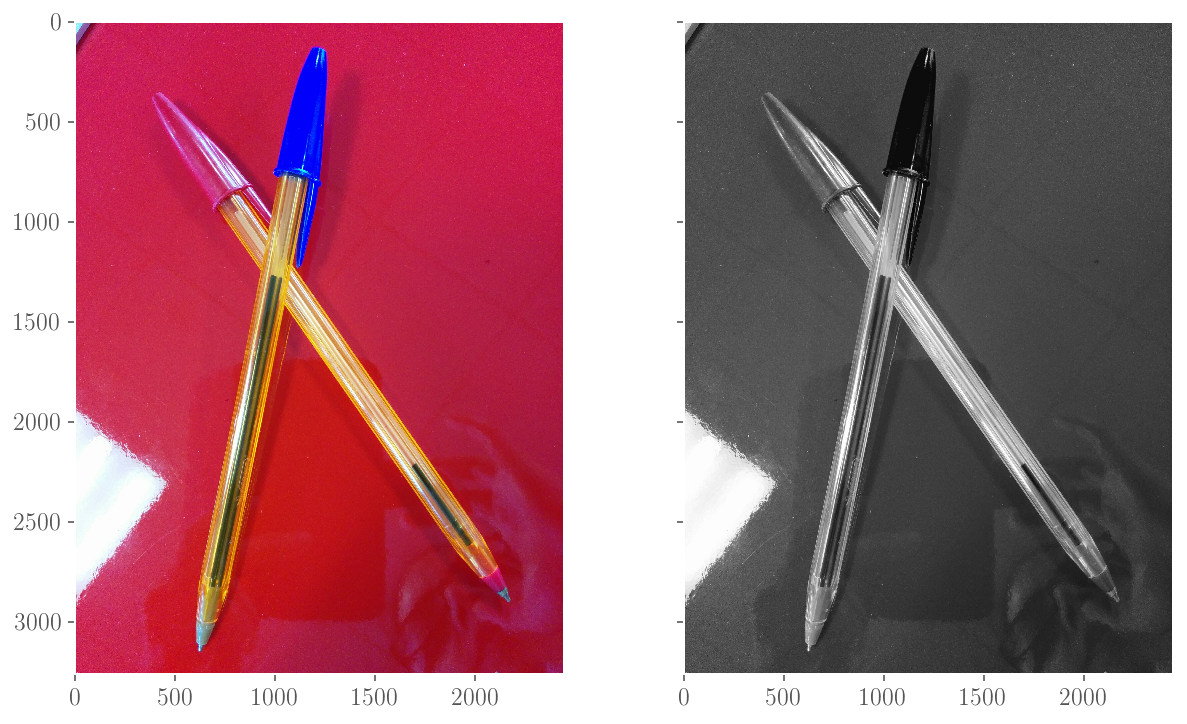

In [8]:
# Showing both the original and the grayscale image

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.grid()
ax1.imshow(RGB_image)

ax2.grid()
plt.gray()
ax2.imshow(gray)

plt.savefig('cv-pens.png', dpi=200)
plt.show();

In [10]:
# Perform a Canny edge detection: can vary the thresholds used to see differences
# the Canny method returns image with edges, we are not changing the default aperture size of the Sobel operator (3)
edged = cv2.Canny(gray, 50, 300)

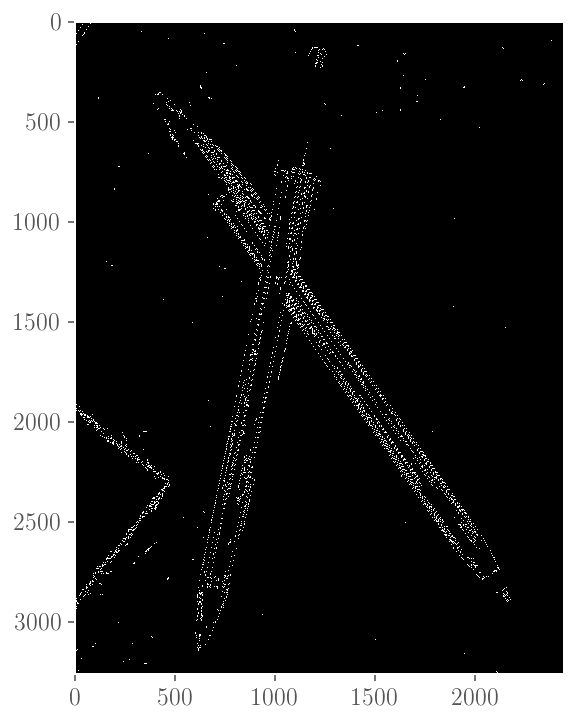

In [11]:
plt.imshow(edged)
plt.grid()
plt.savefig('canny.png', dpi=200)
plt.show();

## Contours

In [22]:
# find the contours on the edged image
# retrieving only the external ones and without compressing them

contours_edged = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cnt, hyer = contours_edged

In [23]:
# drawing contours on original image
# we draw them all (-1), in green ((0, 255, 0)) and with line tickness 3

img = cv2.drawContours(RGB_image, cnt, -1, (0, 255, 0), 3)

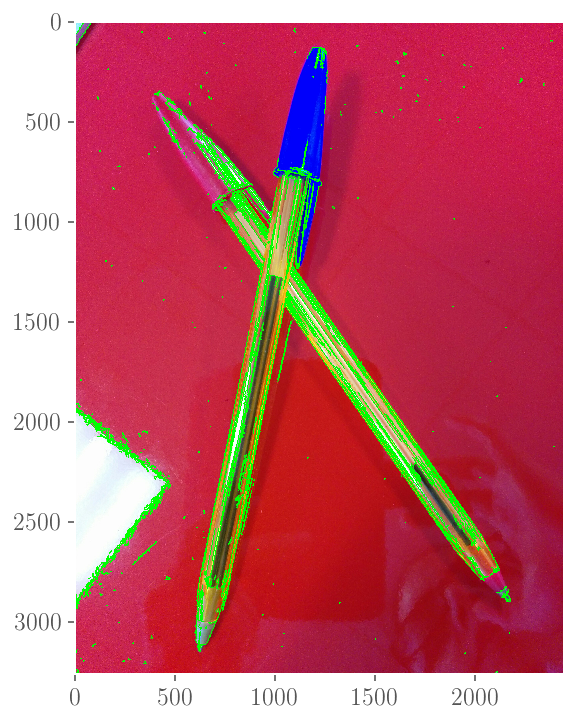

In [25]:
plt.imshow(img)
plt.grid()

plt.savefig('cnt.png', dpi=200)
plt.show();